# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [187]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [169]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [170]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [438, 4, 32]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10290,1981,2232,1038,168,2125
1,22615,5410,7198,3915,1777,5185
2,21632,1318,2886,266,918,405


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
438   57.5  32.3     26.8    37.5              15.0          80.0
4     85.7  64.8     63.6    77.5              63.0          96.8
32    84.5  21.1     35.9     9.5              53.1          24.7


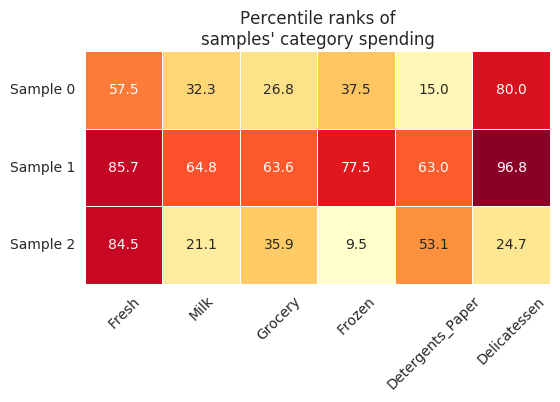

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Sample '+str(x) for x in range(0,3)], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

For 0:
- 'Fresh' is between the second and third quartiles but less than the mean.
- 'Milk' is between the first and second quartiles and less than the mean.
- 'Grocery' is between the first and second quartiles and less than the mean.
- 'Frozen' is between the first and second quartiles and less than the mean.
- 'Detergents_Paper' is below the first quartile but within 1.5 IQR of the first quartile (not an outlier) and below the mean.
- 'Delicatessen' is above the mean and above the third quartile, but is within 1.5 IQR of the third quartile (not an outlier).

I would say 0 may represent a deli, as they have relatively low purchase volume in all but deli items. With 'Fresh' between the 2nd and 3rd quartiles and 'Delicatessen' above the third, I would suggest that this is a medium sized deli. It buys many more 'Delicatessen' products than other places, but is not a particularly large purchaser of any other product category. From my limited knowledge of delis, they seem to specialize heavily and so you wouldn't expect a deli to be selling detergents, so the other numbers seem about right.

For 1:
- 'Fresh' is above the third quartile and the mean, but is within 1.5 IQR of the third quartile (not an outlier).
- 'Milk' is between the second and third quartiles but below the mean.
- 'Grocery' is between the second and third quartiles but below the mean.
- 'Detergents_Paper' is the second and third quartiles but below the mean.
- 'Delicatessen' is above the mean and above the third quartile, but is within 1.5 IQR of the third quartile (not an outlier).

With its amount of fresh and deli purchases, I would label 1 as an eatery of some sort, maybe a restaruant or cafe. The values of its purchases are consistently above the median, so I would venture that 1 is a fairly large restaurant. The amount of purchases across the board may also suggest that this could be a supermarket.

For 2:
- 'Fresh' is above the third quartile and the mean, but is within 1.5 IQR of the third quartile (not an outlier).
- 'Milk' is below the first quartile and the mean, but within 1.5 IQR of the first quartile (not an outlier).
- 'Grocery' is between the first and second quartile and below the mean.
- 'Detergents_Paper' is between the second and third quartiles but below the mean.
- 'Delicatessen' is below the first quartile but within 1.5 IQR of the first quartile (not an outlier) and below the mean.

2 also has a lot of fresh purchases with few purchases in milk, frozen, detergents and delis. The high amount of fresh food makes me think this is another cafe or restaurant, although one of a different size and character from 1. I would say 2 is probably smaller in size than 1.

With the suggestions of a previous reviewer, I've also included a heatmap, which provides a nice visual description of the differences between the different data points.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [188]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from random import randint

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Delicatessen', axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
total_score = 0
for trial in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], test_size=0.25, random_state=trial)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=trial)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    total_score += score
    


print "The R^2 score is {}".format(total_score / 100.0)

The R^2 score is -2.23333452417


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I attempted to predict the purchase of delicatessen products. At the suggestion of a reviewer, I ran 100 trials. My initial score with random states of 26 and 20 had been -0.3247, but the average score over 100 randomized trials here is -2.233 which is *much* lower. It seems my initial sampling had been slightly unlucky in that regard, and running the experiment 100 times with different random states gives a more accurate reflection of the relationship of the data points.

Curiously, the $R^2$ score is $< -1$. Since it ranges between 0 and 1 for a positive relationship, I would have thought the minimum value would be $-1$. But sklearn's DecisionTreeRegressor documentation says: "Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)." This means our regressor is not just a little bit worse than just guessing the mean each time, the regression from the seems terrible at predicting 'Delicatessen'!  I'm not sure exactly how bad it is, as I don't have much experience interpreting $R^2$ values.

Yes, this feature is necessary for identifying customer's spending habits because it cannot be predicted from the other features - it seems to be independent of them. This means that removing this feature would cause us to lose a lot of information about the spending habits of the customer. The $R^2$ is negative, which means that this model actually does significantly worse at predicting the 'Delicatessen' spending than just guessing the mean every time.

'Delicatessen' is a relevant feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

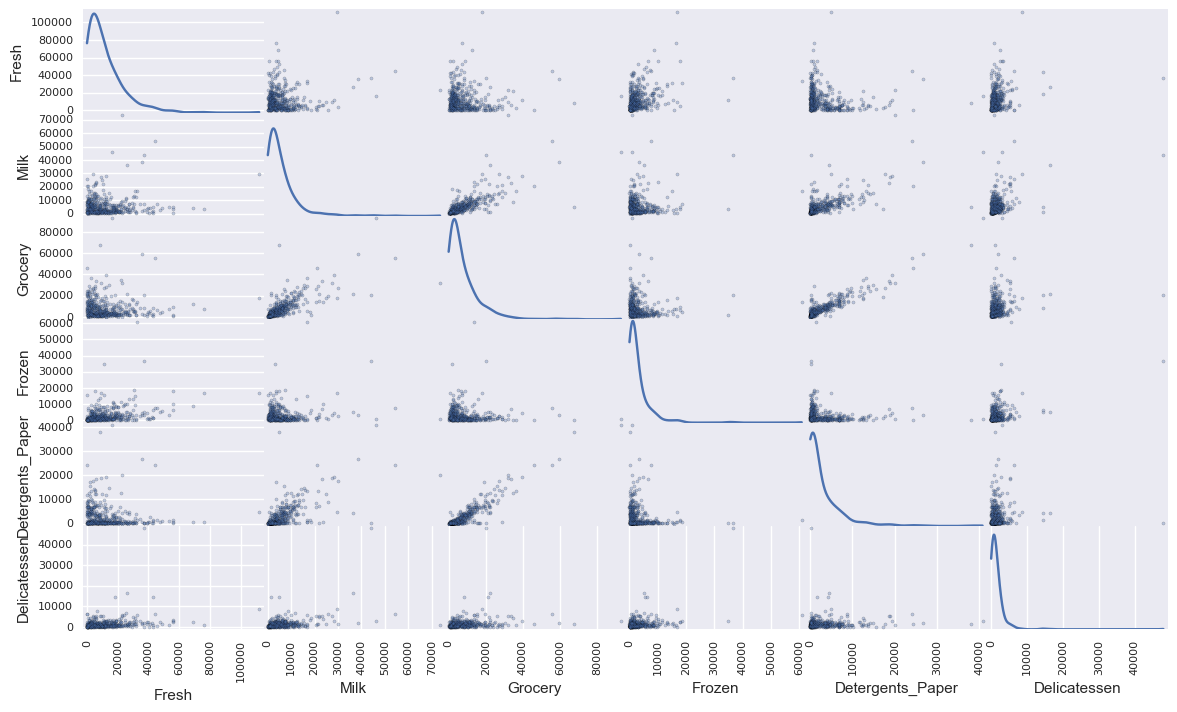

In [173]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Yes, some pairs of features exhibit a degree of correlation. In particular, 'Detergents_Paper' and 'Grocery' seem to have a linear relationship, while 'Grocery' and 'Milk', and 'Detergents_Paper' and 'Milk' have perhaps weaker or noisier linear relationships. 'Fresh' and 'Detergents_Paper', and 'Grocery' and 'Fresh' *may* have negative relationships, although neither of these is very clear cut.

The lack of correlation of any other feature with 'Delicatessen' confirms the relevance of that feature; it is not one one that can be easily predicted from the other features.

All features are heavily positively skewed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

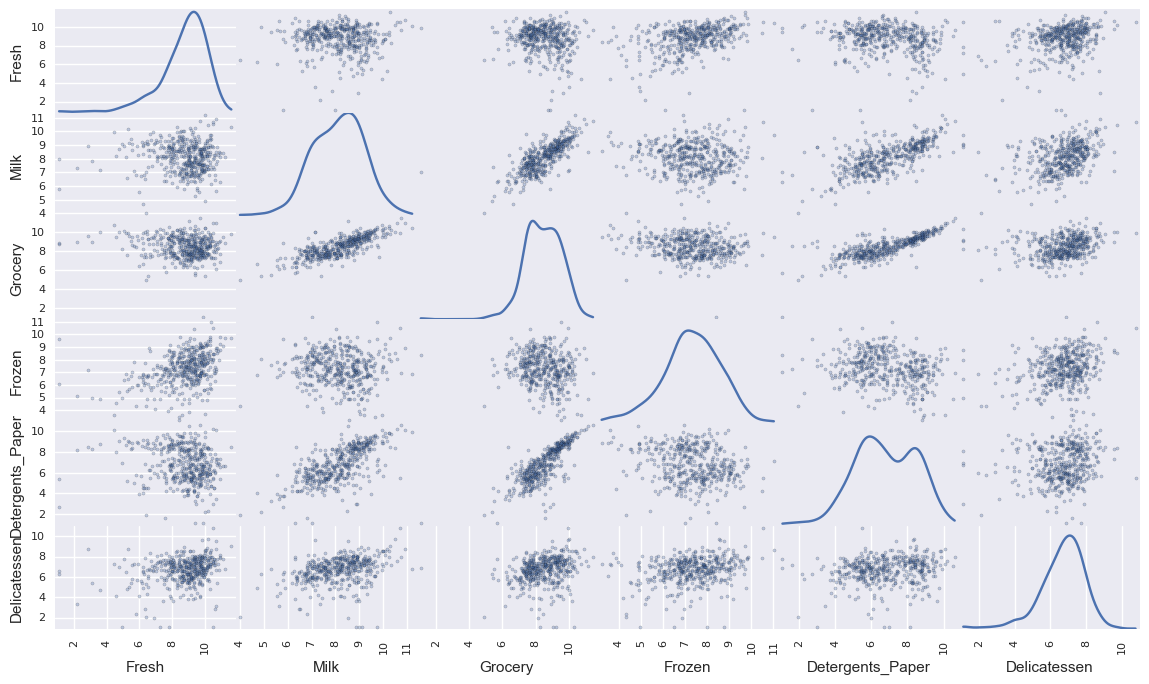

In [174]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [175]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527
1,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
2,9.981929,7.183871,7.967627,5.583496,6.822197,6.003887


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  

Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [176]:
from collections import Counter
counter = Counter()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    
    counter.update(feature_outliers.index.values)
    

# OPTIONAL: Select the indices for data points you wish to remove
outliers = [idx for idx, count in counter.items() if count >= 2]
print "Outliers in two or more features: {}".format(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Recall the earlier summary of our data:"
display(data.describe())
print "Here's the summary of our good data (outliers removed):"
display(good_data.describe())

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers in two or more features: [128, 154, 65, 66, 75]
Recall the earlier summary of our data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Here's the summary of our good data (outliers removed):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, there are data points that there were outliers for multiple features, and these are the data points that I removed. From an intuitive persepective, while there are many data points that are outliers in at least one feature, there are very few that are outliers in multiple features, indicating that these points are especially abnormal.

- 65 is removed because it is an outlier both for 'Frozen' and 'Fresh'.
- 66 is removed because it is an outlier both for 'Delicatessen' and 'Fresh'.
- 128 is removed because it is an outlier both for 'Delicatessen' and 'Fresh'.
- 154 is removed because it is an outlier for 'Delicatessen', 'Milk', and 'Grocery'.
- 75 is removed because it is an outlier for 'Detergents_Paper' and 'Grocery'.

In clustering, our goal is to best understand the categories that our customers typically fall into. I claim that these 5 are not typical customers. To illustrate it this, we can look at how their removal affects the variance of the data. With some code that I added at the end of the previous evaluation cell, we can see that removing just 5 of 440 points leads to *massive* falls in standard deviation across all six features. For example, the change moves the standard deviation of 'Grocery' from ~9503 to ~1. That's close to 4 orders of magnitude difference! These changes seem to indicate that the 435 remaining samples are quite homogeneous. Removing the distortionary effect of these five points should allow us to better understand our customers as a whole.

Having run the clustering with the points removed and with them not removed, the boundaries of the clusters are slightly altered. Looking at my chosen sample points, when I predict their clustering with the original data set in tact, they are predicted to be in the same cluster. This despite the three sample points seeming quite different at face value. This seems to indicate a large distortionary effect from our outlier points, leading to a less informative clustering.

On the other hand, there are also legitimate reasons not to remove the outliers. The outliers may be very significant customers, so even if they are highly atypical one may choose not to remove them. One option is to run the clustering without the outliers and then add them back later after we've already found the cluster centers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


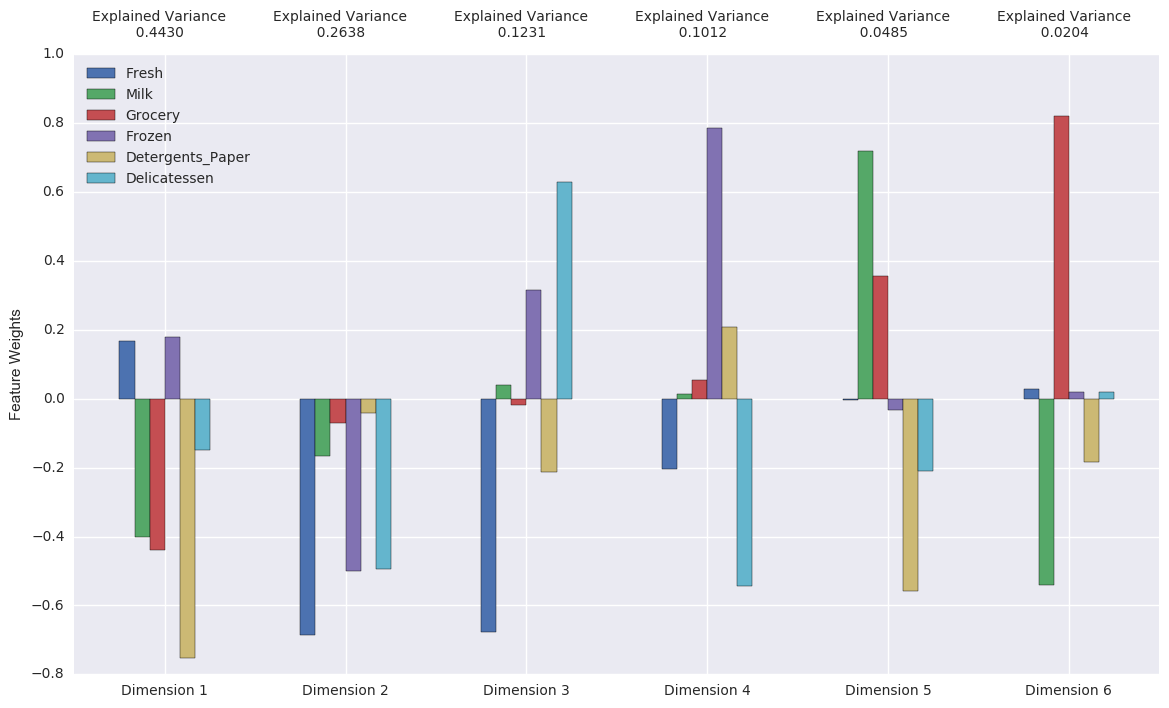

In [177]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA().fit(good_data)


# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first two principal components account for 0.7068 of the total variance. The first four account for 0.9311 of the variance.

The first dimension tells us that the most variance is between those who purchase lots of 'Detergents_Paper', 'Grocery' and 'Milk' and those who purchase loads of 'Fresh' and 'Frozen'. 'Detergents_Paper' is particularly weighty. This dimension appears to capture the difference between restaurants/eateries and supermarkets and other stores.

The second dimension has a negative weight for all of the features. This indicates that maximal variance is not in the direction of features in opposition to each other but to the features taken together. Moving along this dimension would shift the total amount purchased across the six features. As one moves in the negative direction along this dimension, the total purchased by each customer increases. This dimension seems to capture the concept of the *size* of a given customer.

After the first two dimensions are accounted for, the third dimension captures the difference between those with high 'Fresh' purchases and those with high 'Delicatessen' purchases. This is harder to interpret, but it may be distinguishing between restaurants and cafes on one hand and delis on the other as types of eateries.

The fourth dimension shows 'Frozen' and 'Delicatessen' in opposition. After the first three dimensions are accounted for, it seems that those who buy 'Frozen' tend not to buy 'Delicatessen' and vice versa. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [178]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.6691,-0.3980,0.5161,-1.3189,0.0913,0.0056
1,-0.7848,-2.3943,0.4798,-0.3483,-0.3191,0.0613
2,0.5743,0.5709,-1.8390,-1.2760,-0.6685,0.0878


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [179]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [180]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.6691,-0.3980
1,-0.7848,-2.3943
2,0.5743,0.5709


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

In [ ]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-Means:
- very intuitive, easy to implement
- all clusters have a sharply defined boundary. There is no doubt about which cluster a point is in.

Gaussian Mixture Model:
- allows us to express the uncertainty inherent in clustering, and our confidence that any given point actually belongs to an assigned cluster
- not forced to discretely label each data point. If there is any overlap of categories, the data points in the overlap are assigned low probabilities for their classification

I will use GMM because I think there will be significant overlap of the different customers categories. If we had many more data points, it may make sense to use a hybrid approach, wherein we first run K-means, and then use the cluster centers returned by KM as the initial centers for GMM.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [181]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def calculate_score(clusters):
    clusterer = GaussianMixture(n_components=clusters, random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return preds, centers, sample_preds, score

for c_num in range(2, 21):
    _, _, _, score = calculate_score(c_num)
    print "Score for {} clusters: {}".format(c_num, score)

# 3 is the best number of clusters
preds, centers, sample_preds, score = calculate_score(2)

Score for 2 clusters: 0.421916846463
Score for 3 clusters: 0.404248738241
Score for 4 clusters: 0.293269564847
Score for 5 clusters: 0.300456388725
Score for 6 clusters: 0.326139450471
Score for 7 clusters: 0.324227205384
Score for 8 clusters: 0.296476656397
Score for 9 clusters: 0.307187479579
Score for 10 clusters: 0.310351081779
Score for 11 clusters: 0.339126787929
Score for 12 clusters: 0.314329205754
Score for 13 clusters: 0.308270642448
Score for 14 clusters: 0.336523344596
Score for 15 clusters: 0.325983116161
Score for 16 clusters: 0.315503267793
Score for 17 clusters: 0.308772312004
Score for 18 clusters: 0.285541301188
Score for 19 clusters: 0.281997978497
Score for 20 clusters: 0.295170299459


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** My results from trying different numbers of clusters:
- Score for 2 clusters: 0.421916846463
- Score for 3 clusters: 0.404248738241
- Score for 4 clusters: 0.293269564847
- Score for 5 clusters: 0.300456388725
- Score for 6 clusters: 0.326139450471
- Score for 7 clusters: 0.324227205384
- Score for 8 clusters: 0.296476656397
- Score for 9 clusters: 0.307187479579
- Score for 10 clusters: 0.310351081779
- Score for 11 clusters: 0.339126787929
- Score for 12 clusters: 0.314329205754
- Score for 13 clusters: 0.308270642448
- Score for 14 clusters: 0.336523344596
- Score for 15 clusters: 0.325983116161
- Score for 16 clusters: 0.315503267793
- Score for 17 clusters: 0.308772312004
- Score for 18 clusters: 0.285541301188
- Score for 19 clusters: 0.281997978497
- Score for 20 clusters: 0.295170299459

2 has the best silhouette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

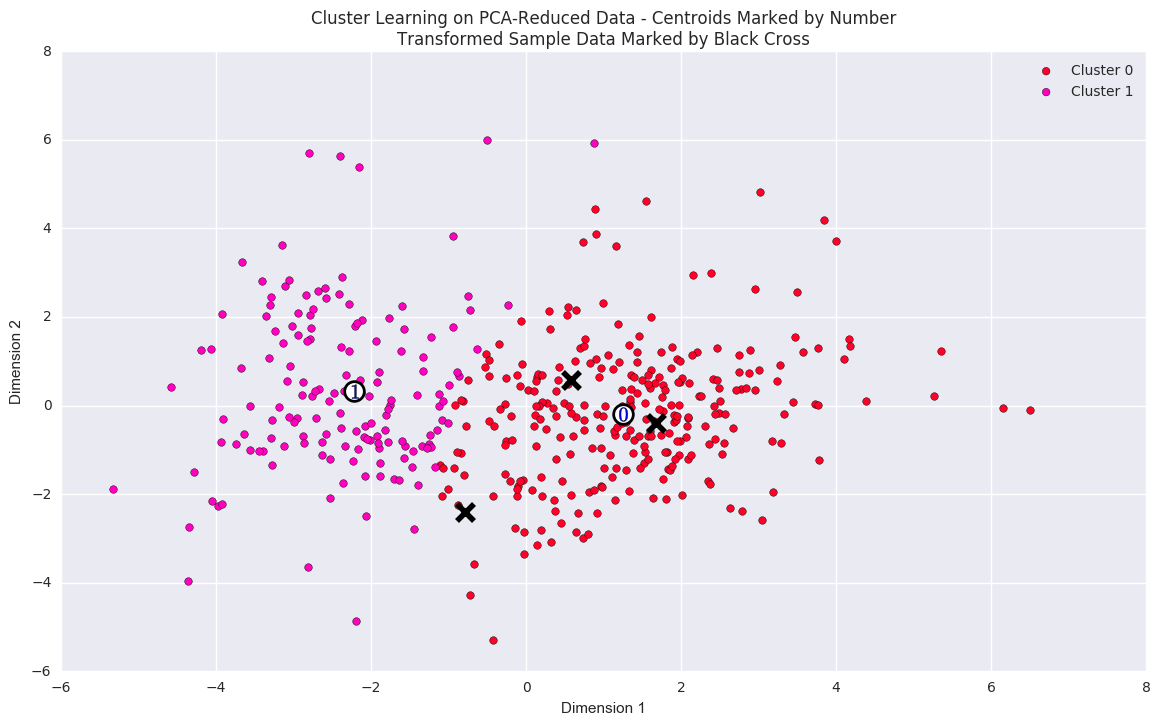

In [182]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [183]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Segment 0:
- 'Fresh' is below the mean but sits between 2nd and 3rd quartiles.
- 'Milk' is below mean but between 2nd a 3rd quartiles.
- 'Grocery' is below mean, between 1st and 2nd quartile.
- 'Frozen' is below mean, between 2nd and 3 quartile.
- 'Detergents_Paper' is between 1st and 2nd quartile.
- 'Delicatessen' is below mean, between 1st and 2nd quartile.

Segment 0 has relatively high purchases in 'Fresh', 'Frozen' and 'Milk' but lower purchases across the other product categories. This segement could represent eateries such as cafes and restaurants, places where you would not expect to buy many 'Detergents_Paper' or 'Grocery' products. Overall purchases are less than you would expect from a supermarket.

Segement 1:
- 'Fresh' below mean, between the 1st and 2nd quartile.
- 'Milk' above mean, above 3rd quartile.
- 'Grocery' above mean, above 3rd quartile.
- 'Frozen' below mean, between 1st and 2nd quartiles.
- 'Detergents_Paper' is above mean, above 3rd quartile.
- 'Delicatessen' is below mean, about 50th percentile.

Segment 1 seems to represent supermarkets. They stock a lot of 'Milk', 'Grocery' and 'Detergents_Paper' and a relatively high amount of 'Delicatessen'.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [184]:
# excuse my garbage python
from numpy.linalg import norm

distances = [(-1, float('inf')), (-1, float('inf')), (-1, float('inf'))]

for (ids,ss) in samples.iterrows():
    for (idc, sc) in true_centers.iterrows():
        dist = norm(ss-sc)
        if dist < distances[ids][1]:
            distances[ids] = (idc, dist)
        
        print "Dist between center {} and sample {}: {}".format(idc, ids, dist)

print distances

display(samples)
display(true_centers)

Dist between center Segment 0 and sample 0: 2267.02227603
Dist between center Segment 1 and sample 0: 14188.6266425
Dist between center Segment 0 and sample 1: 15569.4551607
Dist between center Segment 1 and sample 1: 20739.4564538
Dist between center Segment 0 and sample 2: 12849.2775283
Dist between center Segment 1 and sample 2: 21712.6000055
[('Segment 0', 2267.0222760264178), ('Segment 0', 15569.455160666348), ('Segment 0', 12849.277528328197)]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10290,1981,2232,1038,168,2125
1,22615,5410,7198,3915,1777,5185
2,21632,1318,2886,266,918,405


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


In [185]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:** 
From my definitions in 8, I would put all three of the samples in Segment 0.

Comparing the sample points to the centers by eye, Point 0 seems close to segment 0, with similar 'Fresh', 'Milk', 'Grocery' and 'Detergents_Paper'. Point 1 has 'Fresh', 'Milk', 'Frozen', 'Detergents_Paper' similar to segment 0, 'Milk' and 'Grocery' close to segment 1, so I would place it in 0. 2 seems to have 'Fresh', 'Milk' and 'Grocery' similar to segment 0, so I would throw it in there too.

I added some code above the previous cell to calculate the Euclidean distances. It seems that all three sample points are closest to segment 0.

The predictions are consistent with my intuitive expectations, the three samples that I believe to be eateries are clustered with the data points that I believe to represent eateries.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?



**Answer:** It is likely that similar customers will react to the changes in similar ways, with some unaffected and with others dissatisfied with the service. We have a measure of the similarity of different customers, namely our clustering. The firm can take a small number of firms from each cluster, perhaps 20, and try the new scheme on all 60 of the firms. If there is an overwhelmingly negative response from most of the firms in one cluster, then the company can be reasonably certain that the changes do not meet the needs of its customers in this segment. Likewise, for those segments for which the response is postive or neutral it is likely that the customers are satisfied with the new scheme. The firm could then slowly increase the reach of the scheme within these segments while monitoring the responses of customers.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The wholesaler can use the segments identified by clustering to label the data, assigning to each data point its segment. With the now labelled data, the wholesaler could use a supervised classification technique, such as a decision tree classifier, to predict a segment for each of the new firms.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

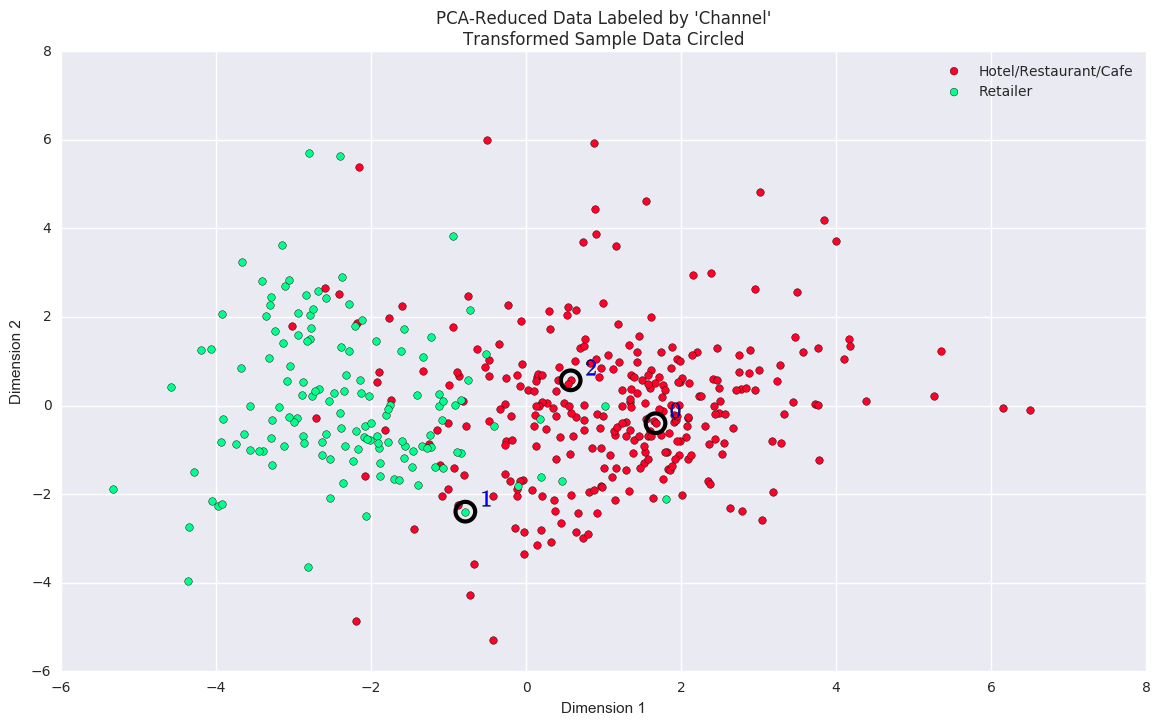

In [186]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** I think the clustering algorithm performed well in recognizing the underlying structure of this data. In our 2 PCA dimensions, we can see that there is a significant amount of overlap between the 'HoReCa' and 'Retail' categories. 

For our clustering, most of the retailers fall into segment 1, while most of the hotels, restaurants and cafes are in segment 0. The number of segments used - 2 - matches the underlying structure (the scores for 2 and 3 clusters were very close to each other).

I think the classifications are consistent with my previous definition of customer segments. 0 and 2 are both correctly identified as cafes/restaurants. 1 is placed in the wrong group but as we can see above, it is very close to the boundary between the 'HoReCa' and 'Retail' categories and there is a lot of overlap between the two.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.